In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

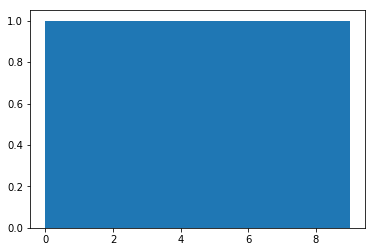

In [2]:
plt.hist(np.arange(10))
plt.show()

In [3]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils_zee import *
import CMS_lumi

Welcome to JupyROOT 6.20/02


In [4]:
samples = ['Run2017', 'DYToEE']
#samples = ['Run2017']
ma, wgt = {}, {}

for s in samples:
    #in_files = glob.glob('Templates/aod/%s*_ma1.txt'%s)
    in_files = glob.glob('Templates/%s*_ma1.txt'%s)
    print(in_files)
    
    ma[s], wgt[s] = [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for l in f:
            ma_, wgt_ = l.replace('\n','').split(':')
            ma[s].append(float(ma_))
            wgt[s].append(float(wgt_))

    ma[s] = np.array(ma[s])
    wgt[s] = np.array(wgt[s])
    wgt[s] = wgt[s][ma[s] > -0.2]
    ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == wgt[s])
    print(len(ma[s]), len(wgt[s]))
    print(ma[s][:5])
    print(wgt[s][:5])

['Templates/Run2017B_ma1.txt', 'Templates/Run2017D_ma1.txt', 'Templates/Run2017E_ma1.txt', 'Templates/Run2017C_ma1.txt', 'Templates/Run2017F_ma1.txt']
13503969 13503969
[0.069651 0.039235 0.082894 0.139563 0.51743 ]
[1. 1. 1. 1. 1.]
['Templates/DYToEE_ma1.txt']
2084409 2084409
[-0.104737 -0.005871  0.348417  0.206033  0.112075]
[6.683568 6.353453 5.170537 5.582994 6.389646]


12943604.8259
687.753967285
13357852.0
800.0


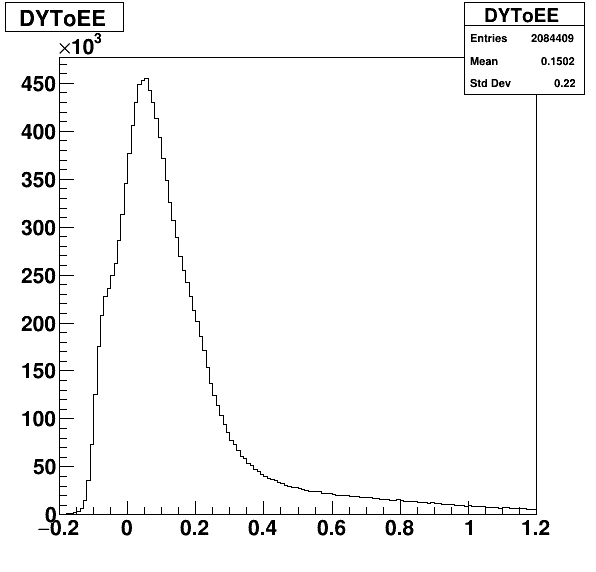

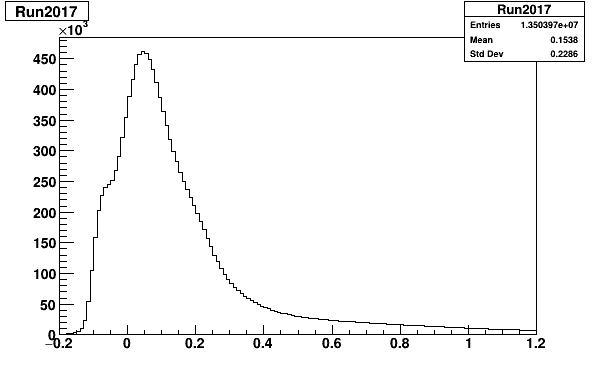

In [6]:
h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

k = 'DYToEE'
kmc = k
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 600)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    #m = (1./0.97)*(m - 0.006)
    #m = 1.036*m - 0.005
    #m = 0.946*m
    #m = 1.01*np.random.normal(m, 0.012) # with correction
    h[k].Fill(m, wgt['DYToEE'][i])
    #h[k].Fill(m)
h[k].Draw("hist")
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = 'Run2017'
kdata = k
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 400)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
h[k].Draw("hist")
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [9]:
#'''
#print(ma_bins)
#scale = 0.97
#offset = 0.006
scale = 1.024
offset = 0.
smear = 0.001
#mcwgts = wgt['DYToEE']*len(ma['Run2017'][ma['Run2017']>-0.2])/sum(wgt['DYToEE'][wgt['DYToEE']>-0.2])
#datawgts = np.ones(len(ma['Run2017']))*sum(wgt['DYToEE'][wgt['DYToEE']>-0.2])/len(ma['Run2017'][ma['Run2017']>-0.2])
#print(len(mcwgts))
#print(len(datawgts))
#ma_shift = smear(ma['Run2017'], 0.97, 0.006, sigma, sigma_frac=None)
#ma_shift = scale*np.array(ma['Run2017']) + offset
#ma_shift = scale*np.array(ma['DYToEE']) + offset
ma_shift = scale*np.array([np.random.normal(m, smear) for m in ma['DYToEE']])
#ma_shift = np.array(ma['Run2017'])
#print(len(ma_shift))
#hdata_shift, edges, _ = plt.hist(ma_shift, bins=ma_bins, histtype='step', label='MC', weights=datawgts, color='grey')
hdata_shift, _ = np.histogram(ma_shift, bins=ma_bins, weights=wgt['DYToEE'])
hdata_shift = np.float64(hdata_shift)
#hdata_shift *= (h['DYToEE'].Integral()/hdata_shift.sum())
hdata_shift *= (h['Run2017'].Integral()/hdata_shift.sum())
#plt.show()

im = h['Run2017'].GetXaxis().FindBin(-0.2)
print(im)
print(hdata_shift.sum())
print(hdata_shift[im-1])
print(hdata_shift)
print(len(hdata_shift))
#'''

1
13357852.0
767.6464531188559
[   767.64645312    958.04988264   1384.44919677   2127.10681052
   2633.58598342   4603.86621574   8590.0987207   19728.88385065
  44957.1429301   86753.26525572 138705.29780445 184911.23284545
 214000.46564093 231880.76072965 240347.2072291  253297.51529534
 265698.14443015 290028.06912169 316498.30344241 349176.9125396
 380696.92368363 409264.76182831 433325.41673581 451339.81455051
 457438.6248134  457898.00526037 449474.61517511 435429.35217638
 421782.16444437 402379.41116106 379589.81189847 359987.55642704
 335057.26108814 316131.52548773 297082.64328955 279683.87467941
 263459.5434185  247496.52542949 237427.86619757 220099.97185618
 209448.83153376 195915.76619704 180397.98091416 165667.20806816
 147925.72932096 133194.34586344 121422.42975839 111277.87000409
 100833.60962516  91892.92432613  83672.45542471  77155.71813545
  72340.87663519  66126.91959966  61150.74999483  58298.82576847
  53728.54130708  51395.63858615  47469.86922347  45089.3519

In [ ]:
def get_KL(data, mc):
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    kl = data*np.log(data/mc)
    return kl.sum()

def get_KS(data, mc):
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    data = np.cumsum(data)
    mc = np.cumsum(mc)
    #print(data[-1], mc[-1])
    return np.max(np.abs(data-mc))

def get_chisq(data, mc):
    #assert np.floor(data.sum()) == np.floor(mc.sum()), 'data:%f vs mc:%f'%(np.floor(data.sum()), np.floor(mc.sum()))
    chisq = (data - mc)**2.
    chisq = chisq/data
    chisq = chisq.sum()/len(mc)-1
    return chisq

hdata, _ = np.histogram(ma['Run2017'], bins=ma_bins)
print(hdata.sum())

def shift_ma(scale, smear):
    if smear == 0.:
        ma_ = scale*ma['DYToEE']
    else:
        ma_ = scale*np.array([np.random.normal(m, smear) for m in ma['DYToEE']])
    hmc_shift, _ = np.histogram(ma_, bins=ma_bins, weights=wgt['DYToEE'])
    hmc_shift = np.float64(hmc_shift)
    #hmc_shift *= (h['Run2017'].Integral()/hmc_shift.sum())
    hmc_shift *= (hdata.sum()/hmc_shift.sum())
    #return get_chisq(hdata, hmc_shift)
    return get_KS(hdata, hmc_shift)

In [19]:
###### scale_nom, offset_nom = 0.97, 0.006
#scale_nom, offset_nom = 1.036, -5.0e-3
scale_nom, offset_nom = 1.010, 0.
smear_nom = 0.012
#smear_nom = 0.

dS = 2
steps = np.arange(dS,4+dS,dS)/1.e3
#steps = np.concatenate([-np.flip(steps), [0.], steps])
#steps = [0.]

n = 0
#for s in [0.]:
for s in np.concatenate([-np.flip(steps), [0.], steps]):#[0.]:
    #for sm in steps:
    #for sm in [0.]:
    for sm in np.concatenate([-np.flip(steps), [0.], steps]):#[0.]:
        n += 1
        #if n < 210: continue
        print('=======================')
        print('iteration:',n)
        scale = scale_nom + s
        smear = smear_nom + sm
        print('scale:',scale)
        print('smear:',smear)
        chsqondfs = [shift_ma(scale, smear) for i in range(10)]
        print('KS:', np.mean(chsqondfs),'+/-',np.std(chsqondfs))

iteration: 1
scale: 1.006
smear: 0.008
KS: 0.00938308885464847 +/- 4.279646551617156e-05
iteration: 2
scale: 1.006
smear: 0.01
KS: 0.009264129140669042 +/- 3.676379965544956e-05
iteration: 3
scale: 1.006
smear: 0.012
KS: 0.009114936909625625 +/- 2.7460988166536758e-05
iteration: 4
scale: 1.006
smear: 0.014
KS: 0.00894662442751123 +/- 3.827057400923738e-05
iteration: 5
scale: 1.006
smear: 0.016
KS: 0.00873206157519727 +/- 5.551218955768244e-05
iteration: 6
scale: 1.008
smear: 0.008
KS: 0.00906133073296177 +/- 4.1450609364639075e-05
iteration: 7
scale: 1.008
smear: 0.01
KS: 0.008907696570217626 +/- 3.397050912277887e-05
iteration: 8
scale: 1.008
smear: 0.012
KS: 0.008792665772107832 +/- 2.3586369299001577e-05
iteration: 9
scale: 1.008
smear: 0.014
KS: 0.008614977993680429 +/- 3.985602983444118e-05
iteration: 10
scale: 1.008
smear: 0.016
KS: 0.008478806754330059 +/- 4.046190009422867e-05
iteration: 11
scale: 1.01
smear: 0.008
KS: 0.008734547133645054 +/- 3.139459618443818e-05
iteration: 1

In [ ]:
'''
=======================
iteration: 1
scale: 1.006
smear: 0.008
KS: 0.00938308885464847 +/- 4.279646551617156e-05
=======================
iteration: 2
scale: 1.006
smear: 0.01
KS: 0.009264129140669042 +/- 3.676379965544956e-05
=======================
iteration: 3
scale: 1.006
smear: 0.012
KS: 0.009114936909625625 +/- 2.7460988166536758e-05
=======================
iteration: 4
scale: 1.006
smear: 0.014
KS: 0.00894662442751123 +/- 3.827057400923738e-05
=======================
iteration: 5
scale: 1.006
smear: 0.016
KS: 0.00873206157519727 +/- 5.551218955768244e-05
=======================
iteration: 6
scale: 1.008
smear: 0.008
KS: 0.00906133073296177 +/- 4.1450609364639075e-05
=======================
iteration: 7
scale: 1.008
smear: 0.01
KS: 0.008907696570217626 +/- 3.397050912277887e-05
=======================
iteration: 8
scale: 1.008
smear: 0.012
KS: 0.008792665772107832 +/- 2.3586369299001577e-05
=======================
iteration: 9
scale: 1.008
smear: 0.014
KS: 0.008614977993680429 +/- 3.985602983444118e-05
=======================
iteration: 10
scale: 1.008
smear: 0.016
KS: 0.008478806754330059 +/- 4.046190009422867e-05
=======================
iteration: 11
scale: 1.01
smear: 0.008
KS: 0.008734547133645054 +/- 3.139459618443818e-05
=======================
iteration: 12
scale: 1.01
smear: 0.01
KS: 0.008629320749323998 +/- 4.1235306452914444e-05
=======================
iteration: 13
scale: 1.01
smear: 0.012
KS: 0.008493221968984855 +/- 7.319920633788543e-05
=======================
iteration: 14
scale: 1.01
smear: 0.014
KS: 0.008531094118101296 +/- 9.389256662512527e-05
=======================
iteration: 15
scale: 1.01
smear: 0.016
KS: 0.008822832423460391 +/- 9.044122106057489e-05
=======================
iteration: 16
scale: 1.012
smear: 0.008
KS: 0.008644280767158346 +/- 6.09690873738167e-05
=======================
iteration: 17
scale: 1.012
smear: 0.01
KS: 0.008646063545073556 +/- 7.228973717798855e-05
=======================
iteration: 18
scale: 1.012
smear: 0.012
KS: 0.008706532308589194 +/- 6.057858815470401e-05
=======================
iteration: 19
scale: 1.012
smear: 0.014
KS: 0.008942171432964946 +/- 9.12206468662482e-05
=======================
iteration: 20
scale: 1.012
smear: 0.016
KS: 0.009170558230945263 +/- 0.00011720585194287386
=======================
iteration: 21
scale: 1.014
smear: 0.008
KS: 0.008968668546777964 +/- 6.717975785455243e-05
=======================
iteration: 22
scale: 1.014
smear: 0.01
KS: 0.008973455387696078 +/- 6.661332411751808e-05
=======================
iteration: 23
scale: 1.014
smear: 0.012
KS: 0.0091316844010283 +/- 9.443079273907445e-05
=======================
iteration: 24
scale: 1.014
smear: 0.014
KS: 0.009349731522810368 +/- 6.498265471516501e-05
=======================
iteration: 25
scale: 1.014
smear: 0.016
KS: 0.009581688639012731 +/- 0.00012345016387567813
'''

In [ ]:
'''
iteration: 25
scale: 1.01
smear: 0.01
KS: 0.00854802411450617 +/- 0.0
=======================
iteration: 26
scale: 1.01
smear: 0.012
KS: 0.008486791454725418 +/- 0.0
=======================
iteration: 27
scale: 1.01
smear: 0.014
KS: 0.008520527084964646 +/- 0.0
'''

max: 469146.84375
41.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: pdf file Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o10MeV_nocorr_ptrwgt.pdf has been created


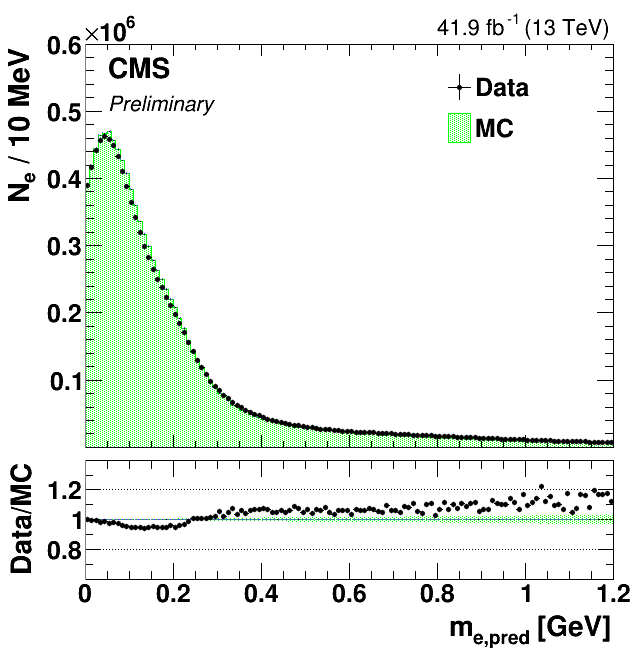

In [7]:
hc = {}

do_trunc = True
#do_trunc = False

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(640*1), int(680*1)
#ROOT.TGaxis.fgMaxDigits = 3
#ROOT.gStyle.SetErrorX(0)
#ROOT.gStyle.SetOptStat(0)

k = kdata
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)

pUp = ROOT.TPad("upperPad", "upperPad",.005, .300, .995, .995) # (,,Double_t xlow, Double_t ylow, Double_t xup, Double_t yup,...)
pDn = ROOT.TPad("lowerPad", "lowerPad",.005, .005, .995, .300)
pUp.Draw()
pDn.Draw()
pUp.SetMargin(13.e-02,3.e-02,2.e-02,9.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)
pDn.SetMargin(13.e-02,3.e-02,36.e-02,2.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)

pUp.cd()

# dummy hist for drawing axes
hdummy = h[k].Clone()
hdummy.Reset()
hdummy.SetName('dummy')
hdummy = set_hist(hdummy, "m_{e,pred} [GeV]", "N_{a}", "")
hdummy.GetYaxis().SetTitle('N_{e} / %d MeV'%dM)
hdummy.GetXaxis().SetTitle('')
hdummy.GetXaxis().SetLabelSize(0.)
hdummy.GetYaxis().SetTitleOffset(0.9)
hdummy.GetYaxis().SetTitleSize(0.07)
hdummy.GetYaxis().SetLabelSize(0.06)
hdummy.GetYaxis().SetMaxDigits(3)
hdummy.SetLineColor(0)
hdummy.Draw("hist")

# Plot MC
k = kmc
h[k].Scale(h[kdata].Integral()/h[kmc].Integral())
print('max:',h[k].GetMaximum())
# Plot fill
hc[k] = h[k].Clone()
hc[k].SetLineColor(3)
hc[k].SetFillColor(3)
hc[k].SetFillStyle(fill_style)
hc[k].SetStats(0)
hc[k].Draw("hist same")
# Plot uncertainty
h[k].SetLineColor(9)
h[k].SetFillColor(9)
h[k].SetFillStyle(fill_style)
h[k].SetStats(0)
h[k].Draw("%s same"%err_style)

# Plot data
k = kdata
hc[k] = h[k].Clone()
hc[k].SetName(kdata+'errs')
hc[k].SetFillStyle(0)
hc[k].SetMarkerStyle(20)
#hc[k].SetMarkerSize(0.85)
hc[k].SetMarkerSize(0.7)
hc[k].SetStats(0)
hc[k].Draw("E same")

#if ymax_ is None and hc[k].GetBinContent(2) > 0.:
ymax_lowbin = 1 if do_trunc else 2
if dM == 100:
    ymax = 6.e6
elif dM == 10:
    ymax = 6.e5
else:
    ymax = 1.3*max(np.max([hc[kdata].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kdata].GetNbinsX()+2)]),
                   np.max([hc[kmc].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kmc].GetNbinsX()+2)]))
#ymax = 6.e5 #dM=10
hdummy.GetYaxis().SetRangeUser(0.1, ymax)
if do_trunc:
    hdummy.GetXaxis().SetRangeUser(0., 1.2)
else:
    hdummy.GetXaxis().SetRangeUser(-0.2, 1.2)
ROOT.gPad.RedrawAxis()

l, l2, hatch = {}, {}, {}
legend = {}

'''l[k] = ROOT.TLine(0.135, 0., 0.135, ymax) # x0,y0, x1,y1
l[k].SetLineColor(14)
l[k].SetLineStyle(7)
l[k].Draw("same")

l2[k] = ROOT.TLine(0.55, 0., 0.55, ymax) # x0,y0, x1,y1
l2[k].SetLineColor(14)
l2[k].SetLineStyle(7)
l2[k].Draw("same")'''

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[0.,ymax]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
#hatch[k].SetLineWidth(5)
hatch[k].SetFillStyle(3004)
#hatch[k].SetFillColor(14)
hatch[k].SetFillColor(12)
#ROOT.gStyle.SetHatchesLineWidth(2)
hatch[k].Draw("same")

legend[k] = ROOT.TLegend(0.7,0.68,0.9,0.86) #(x1, y1, x2, y2)
legend[k].AddEntry(kdata+'errs', "Data", "lep")
legend[k].AddEntry(h[kmc].GetName(), "MC", "f")
legend[k].SetBorderSize(0)
legend[k].Draw("same")

CMS_lumi.CMS_lumi(pUp, iPeriod, iPos)

##### Ratio plots on lower pad #####
pDn.cd()
pDn.SetTicky()
pDn.SetGridy()

if do_trunc:
    fUnity = ROOT.TF1("fUnity","[0]",0.,1.2)
else:
    fUnity = ROOT.TF1("fUnity","[0]",-0.2,1.2)
fUnity.SetParameter( 0,1. )

fUnity.GetXaxis().SetTitle("m_{e,pred} [GeV]")
fUnity.GetXaxis().SetTickLength(0.1)
fUnity.GetXaxis().SetTitleOffset(1.05)
fUnity.GetXaxis().SetTitleSize(0.16)
fUnity.GetXaxis().SetLabelSize(0.14)
#if not do_trunc:
#    fUnity.GetXaxis().ChangeLabel(1,-1, 0,-1,-1,-1,"")
#    fUnity.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"#font[22]{#gamma_{veto}}")

#dY = 0.199
dY = 0.399
#fUnity.GetYaxis().SetTitle("SB/SR")
fUnity.GetYaxis().SetTitle("Data/MC")
#fUnity.GetYaxis().SetRangeUser(1.-dY,1.+dY)
fUnity.SetMaximum(1.+dY)
fUnity.SetMinimum(1.-dY)
fUnity.GetYaxis().SetNdivisions(305)
fUnity.GetYaxis().SetTickLength(0.04)
fUnity.GetYaxis().SetLabelFont(62)
fUnity.GetYaxis().SetTitleFont(62)
fUnity.GetYaxis().SetTitleOffset(.4)
fUnity.GetYaxis().SetTitleSize(0.16)
fUnity.GetYaxis().SetLabelSize(0.14)

fUnity.SetLineColor(9)
fUnity.SetLineWidth(1)
fUnity.SetLineStyle(7)
fUnity.SetTitle("")
fUnity.Draw()

# Data error bands
#k = kdata
#kr = kdata+'err'
# MC error bands
k = kmc
kr = kmc+'errs'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetNbinsX()-1):
    ib = i+2
    h[kr].SetPoint(i, h[k].GetBinCenter(ib), 1.)
    h[kr].SetPointError(
        i,
        h[k].GetBinWidth(ib)/2.,
        h[k].GetBinWidth(ib)/2.,
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        )
#h[kr].SetFillColor(9)
h[kr].SetFillColor(3)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")

# Data errors
kr = 'dataomc'+'errs'
h[kr] = h[kdata].Clone()
h[kr].Reset()
h[kr].SetName(kr)
for ib in range(1, h[k].GetNbinsX()+1):
    obs = h[kdata].GetBinContent(ib)
    obs_err = h[kdata].GetBinError(ib)
    bkg = h[kmc].GetBinContent(ib)
    if bkg == 0.: continue
    bkg_err = h[kmc].GetBinError(ib)
    h[kr].SetBinContent(ib, obs/bkg)
    h[kr].SetBinError(ib, obs_err/obs)
#h[kr].SetLineColor(9)
h[kr].SetStats(0)
#h[kr].Divide(h[kmc])
h[kr].SetMarkerStyle(20)
#h[kr].SetMarkerSize(0.85)
h[kr].SetMarkerSize(0.7)
h[kr].SetMarkerColor(1)
h[kr].SetLineColor(1) #9
h[kr].Draw("ep same")

k = kr
'''l[k] = ROOT.TLine(0.135, 1.-dY, 0.135, 1.+dY) # x0,y0, x1,y1
l[k].SetLineColor(14)
l[k].SetLineStyle(7)
l[k].Draw("same")

l2[k] = ROOT.TLine(0.55, 1.-dY, 0.55, 1.+dY) # x0,y0, x1,y1
l2[k].SetLineColor(14)
l2[k].SetLineStyle(7)
l2[k].Draw("same")'''

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[1.-dY,1.+dY]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
hatch[k].SetFillStyle(3004)
hatch[k].SetFillColor(14)
hatch[k].Draw("same")

k = kdata
c[k].Draw()
c[k].Update()
#c[k].Print('Plots/%s_sb2srvsr_blind_%s.eps'%(samples, blind))
#c[k].Print('Plots/%s_sb2srvsr_blind_%.eps'%(samples, blind))
#samples_str = '_'.join(samples)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_noptrwgt.pdf'%dM)
c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_ptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_corr_ptrwgt.pdf'%dM)

#draw_hist_1dmastacked()